# Pré-processamento de dados
Tratamento de dados - detecção de anomalias

In [37]:
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd

dataset para simulação de anomalias

In [3]:
dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

In [4]:
dados = np.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


### Visualizando dados anômalos

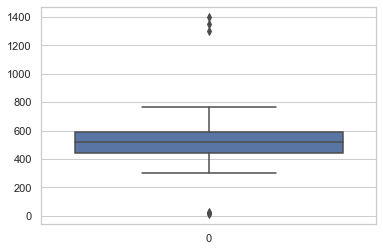

In [8]:
sns.set(style='whitegrid', color_codes=True)
sns.boxplot(data=dados);

Verificando o valor da média

In [10]:
np.mean(dados, axis=0)

530.3673469387755

Verificando o valor da mediana

In [27]:
np.median(dados, axis=0)

517.5

Verificando o valor do desvio padrão

In [11]:
np.std(dados, axis=0)

192.51166875607043

Fronteira de valor abaixo da média em duas vezes o desvio padrão

In [29]:
mean = np.mean(dados, axis=0)
sd = np.std(dados, axis=0)
median = np.median(dados, axis=0)

In [14]:
mean - 2 * sd

145.34400942663467

Fronteira de valor abaixo da média em duas vezes o desvio padrão (usando a mediana)

In [30]:
median - 2 * sd

328.6155572758476

fronteira de valores acima da média em duas vezes o desvio padrão

In [16]:
mean + 2 * sd

915.3906844509164

Fronteira de valor acima da média em duas vezes o desvio padrão (usando a mediana)

In [31]:
median + 2 * sd

706.3844427241524

Listando os valores abaixo da média em duas vezes o desvio padrão

In [17]:
for x in dados:
    if (x < mean - 2 * sd):
        print(x)

10
20
30


Listando os valores acima da média em duas vezes o desvio padrão

In [20]:
for x in dados:
    if (x > mean + 2 * sd):
        print(x)

1300
1350
1400


removendo os valores muito abaixo da média(10
20
30)

In [21]:
dados = [x for x in dados if (x > mean - 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


removendo os valores muito acima da média(1300
1350
1400)

In [23]:
dados = [x for x in dados if (x < mean + 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


Visualizando os valores novamente

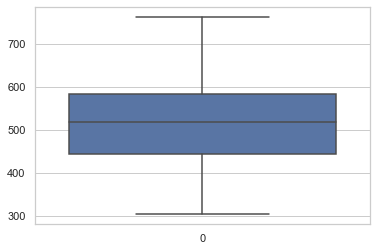

In [26]:
sns.boxplot(data=dados);

# Técnicas de processamento de Dados - Discretização

Conjunto de dados exemplo

In [38]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

Aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [39]:
altura = pd.qcut(altura,3,labels=['P','M','G'])
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


Verificando a quantidade de objetos em cada BIN

In [40]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

Lendo a base de dados

In [42]:
dataset = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\materiais-de-apoio-pandas - Curso Edu\Materiais-de-apoio-Pre-processamento-de-Dados\kc_house_data.csv")

Contando o número de pisos

In [43]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [45]:
dataset['floors_labels'] = pd.cut(
                                    dataset['floors'],
                                    5,
                                    labels=['Muito-pequeno','Pequeno','Médio','Grande','Muito-Grande']
                                  )

Verificando novo atributo

In [46]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


In [48]:
dataset['floors_labels'].unique()

['Muito-pequeno', 'Pequeno', NaN, 'Grande', 'Médio', 'Muito-Grande']
Categories (5, object): ['Muito-pequeno' < 'Pequeno' < 'Médio' < 'Grande' < 'Muito-Grande']

Contagem de valores em cada bin ou categoria

In [49]:
dataset['floors_labels'].value_counts()

Muito-pequeno    12589
Pequeno           8241
Grande             613
Médio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

## Técnicas de processamentos de dados

Norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado

Bibliotecas necessárias

In [51]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

exemplo de dados

In [53]:
data = [
        [-1,2],
        [0.5,6],
        [0,10],
        [1,18]
        ]
print(data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


Valor da média

In [54]:
print(np.mean(data))

4.5625


Visualizando a distribuição dos dados

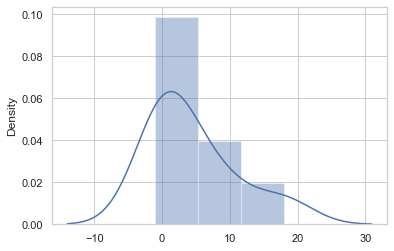

In [56]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

Instaciando o objeto Normalize

In [59]:
normalizer = Normalizer().fit(data)

Aplicando a normalização nos dados de exemplo utilizando a norma L2

In [61]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


valor da média

In [62]:
print(np.mean(data2))

0.4475919008033141


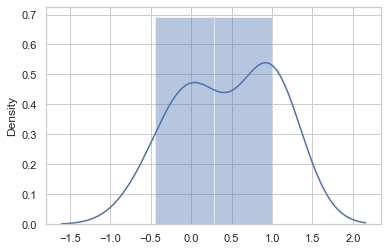

In [63]:
sns.distplot(data2.reshape(-1))
plt.show()

## Técnicas de processamentos de dados - Standartization

In [94]:
data = np.random.normal(5,10,size=50,)
print(data)

[ -8.25601533  -6.75871275   9.31790561   7.18802526   0.93433835
   7.28174256  -1.35679242  -2.94540927   6.70995031  19.0030818
   5.09342501  -7.52931994  -1.23042763   8.59401053   5.19134998
  17.88487304  13.93865426  -3.29839326   7.04192909  -5.58863328
  11.70633143  17.77148906 -10.16294439   9.03285747  -3.54669355
   5.00980943   5.12986126   0.73999772  18.18725609  -0.19909114
  11.67505117  11.01316501  -4.26445337  -0.59736981  -4.44099687
  -4.49833905   0.55666885  16.13705034   5.2928123    1.31948263
   4.11221523 -10.22625195  -5.1586506   -4.8374205   -0.81456579
  -5.68529885   9.34833108  -9.81357684   6.09451318  10.29203843]


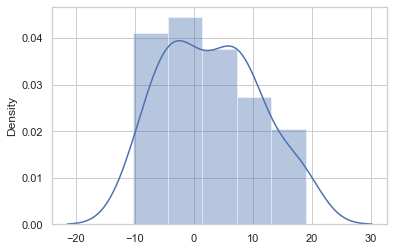

In [98]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

Bilbiotecas necessárias

In [91]:
from sklearn.preprocessing import MinMaxScaler

instanciando o objeto scaler

In [104]:
data = np.array(data).reshape(-1,5)
scaler = MinMaxScaler().fit(data)

Transformando os dados com o objeto scaler

In [105]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.         0.12385068 0.74071688 0.52228511 0.26525078]
 [0.59438523 0.31679197 0.27443105 0.50152152 1.        ]
 [0.51067279 0.09632677 0.33963949 0.58334939 0.43835833]
 [1.         0.863102   0.2610096  0.51593991 0.        ]
 [0.76364454 1.         0.         0.60240924 0.08303364]
 [0.50747414 0.54847686 0.41456062 1.         0.21916089]
 [0.76244794 0.75861181 0.22427727 0.18415245 0.0466676 ]
 [0.14374708 0.38513539 1.         0.43997286 0.28091233]
 [0.47313735 0.         0.19027737 0.         0.19413317]
 [0.09834082 0.69914866 0.01328394 0.47479206 0.64577325]]


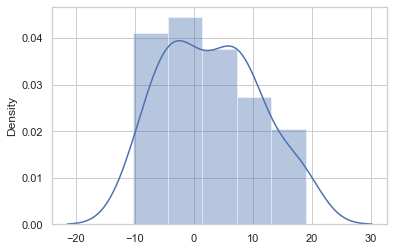

In [106]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

## StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma
* Mantém a escala dos dados mais fiel que a técnica MinMaxScale

Bibliotecas necessárias

In [108]:
from sklearn.preprocessing import StandardScaler

instânciando o objeto scaler

In [111]:
data = np.array(data).reshape(-1,5)
scaler = StandardScaler().fit(data)

Transformando os dados com o objeto scaler

In [113]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 1.74835958 -0.49022072 -1.05263759 -0.18564115 -0.70639315]
 [ 0.28252463 -0.32743001 -0.66652771  1.42023882  0.46798081]
 [-0.66380007  1.38026568 -0.66368945 -0.33774023 -1.49910092]
 [-0.96272394  0.45196649  0.30396091  0.63280495 -0.63874155]
 [-0.43112686 -0.05751255 -0.46992588 -2.19931377 -0.30074108]
 [-0.18587414  1.24545327 -1.41844669  0.95551913  1.56592863]
 [ 1.48582339 -2.08915303  1.86766063 -0.87750442  1.26834941]
 [ 0.75924113 -0.640416    0.05972104 -0.15968657 -0.91666853]
 [-1.47775264 -0.46962812  0.78573101 -0.17488061  1.20030437]
 [-0.55467108  0.99667499  1.25415373  0.92620385 -0.440918  ]]


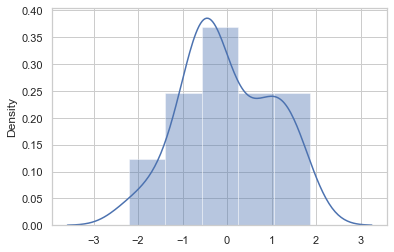

In [114]:
sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()